In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt, exp
from mpl_toolkits.mplot3d import Axes3D

In [3]:
class BS:
    #first define the initial parameters and reference to the instance being constructed
    def __init__ (self, S0, K, T, r, sigma):
        self.S0 = S0
        self.K = K
        self.T = T
        self.r = r
        self.sigma = sigma
        
        #define d1 and d2 (instances built on the initial parameters)
        self.d1 = (np.log(self.S0/self.K)+(self.r+0.5*(self.sigma**2))*self.T)/(self.sigma*np.sqrt(self.T))
        self.d2 = self.d1 - self.sigma * np.sqrt(self.T)
        
    def delta (self):
        return (norm.cdf(self.d1)-1)
    
    #using the pdf in this case, due to the fact that it is the 
    #derivative of cdf
    
    def theta (self): 
        return - (self.S0 * norm.pdf(self.d1)*self.sigma) / (2 * np.sqrt(self.T)) + self.r * self.K * np.exp(-self.r*self.T) * norm.cdf(-self.d2)
    
    def gamma (self):
        return norm.pdf(self.d1) / (self.S0 * self.sigma * np.sqrt(self.T))
    
    
gamma = BS(49, 50, 0.3846, 0.05, 0.2).gamma()
gamma

0.06554537725247868

In [4]:
theta = BS(49, 50, 0.3846, 0.05, 0.2).theta()
theta

-1.8530056721968677

In [5]:
# bonus task;
#demonstrate of using the class;
#for example plotting delta for different stock price and time to maturity

#first initial parameters; stock price (between 1 and 50 for 50 steps in time)
#define the other parameter time (50 steps in time, 2.8 years maturity)
#using parameters from gamma otherwise

S = np.linspace(1,50,50)
T = np.linspace(0.01, 2.8, 50)

#creating initial array
d = np.array([])
#using a for loop to iterate through the series
for i in range(0, len(T)):
    d = np.append(d, BS(S, 50, T[i], 0.05, 0.2).delta(), axis=0)
d

array([-1.        , -1.        , -1.        , ..., -0.32143745,
       -0.29968911, -0.27905133])

Text(0.5, 0, 'delta')

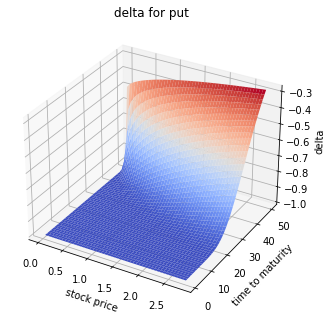

In [6]:
#conducting 3d plot as in lecture 3c
#using np.meshgrid to get the same shape of the two objects
X, Y = np.meshgrid(S, T)

import matplotlib.cm as cm

#error: arg Z must be 2d
#solution: reshape
d = d.reshape(len(S), len(T))

figd = plt.figure()
ax = Axes3D(figd)
ax.plot_surface(Y, X, d, rstride = 1, cstride=1, cmap=cm.coolwarm, shade='interp')
plt.title('delta for put')
ax.set_xlabel('stock price')
ax.set_ylabel('time to maturity')
ax.set_zlabel('delta')